 Analysis -> Feature Engg -> Model -> Web App

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
sns.set_style=("whitegrid")

In [9]:
df = pd.read_csv("german_credit_data.csv")

In [10]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [12]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [13]:
df.shape

(1000, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [15]:
df.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [16]:
df["Job"].unique()

array([2, 1, 3, 0])

In [17]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df = df.dropna().reset_index(drop=True)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [20]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

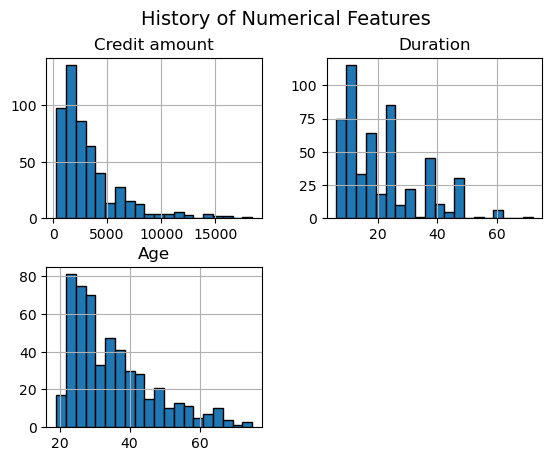

In [21]:
df[["Credit amount", "Duration", "Age"]].hist(bins=20, edgecolor='black')
plt.suptitle("History of Numerical Features", fontsize=14)
plt.show()

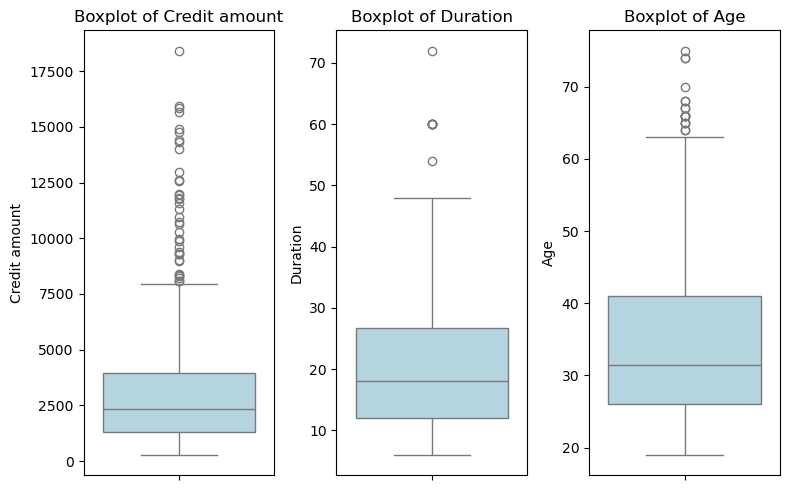

In [22]:
plt.figure(figsize=(8,5))
for i, col in enumerate(["Credit amount", "Duration", "Age"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [23]:
df.query("Duration > 70")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
358,677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [24]:
catagorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\4084320154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\4084320154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\4084320154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts()

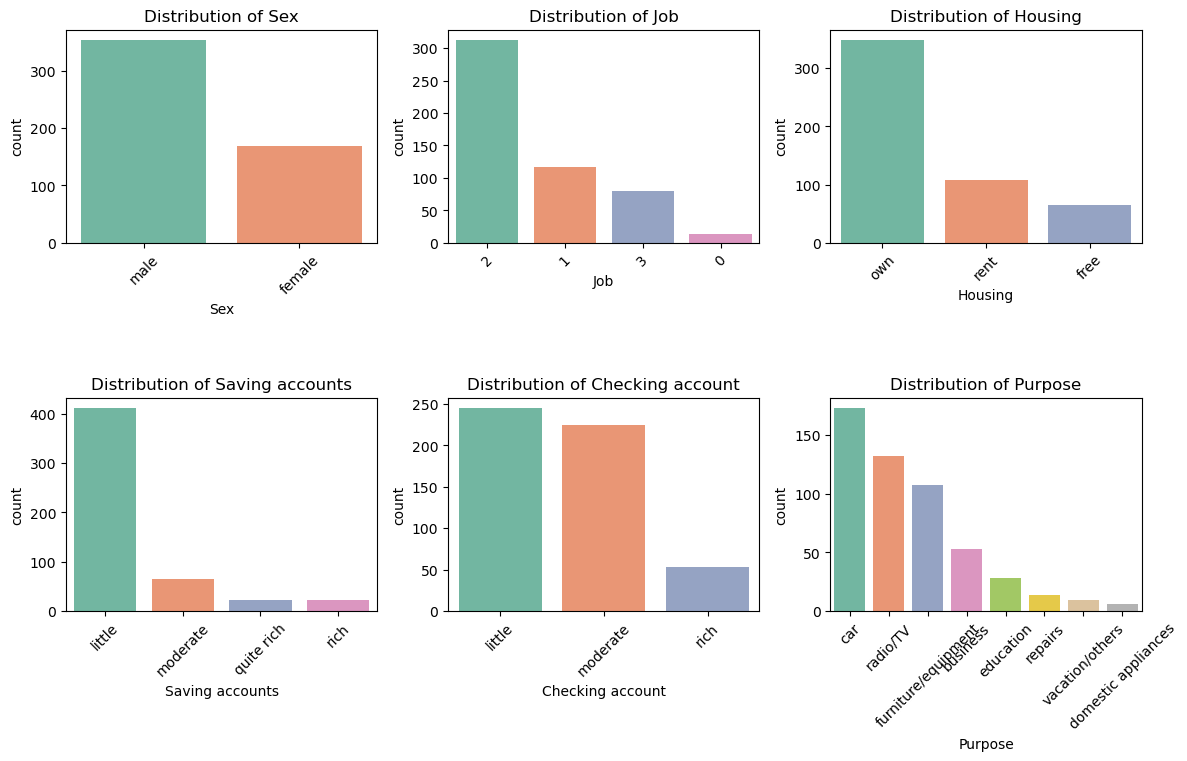

In [25]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(catagorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()
plt.figure(figsize=(6, 4))
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Figure size 600x400 with 0 Axes>

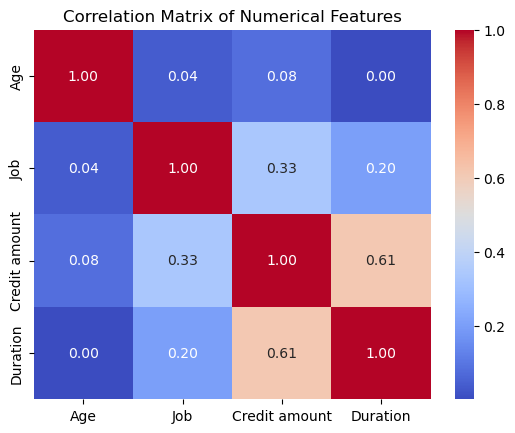

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [28]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [29]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [30]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns = "Purpose", aggfunc=np.mean)

C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\735900553.py:1: FutureWarning: The provided callable <function mean at 0x000001D55AA03380> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, values="Credit amount", index="Housing", columns = "Purpose", aggfunc=np.mean)


Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


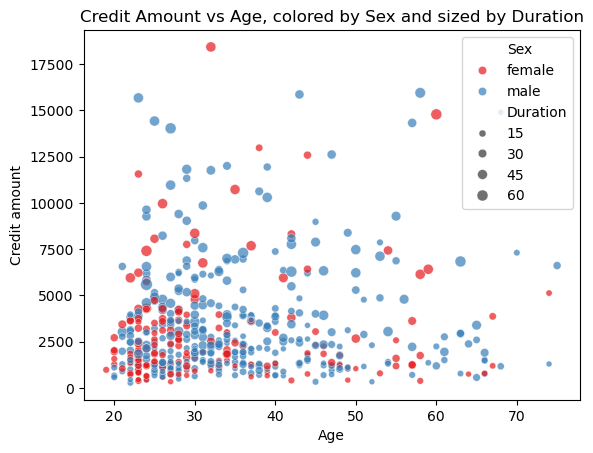

In [31]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", palette="Set1", size="Duration", alpha=0.7)
plt.title("Credit Amount vs Age, colored by Sex and sized by Duration")
plt.show()

C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\3936670938.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")


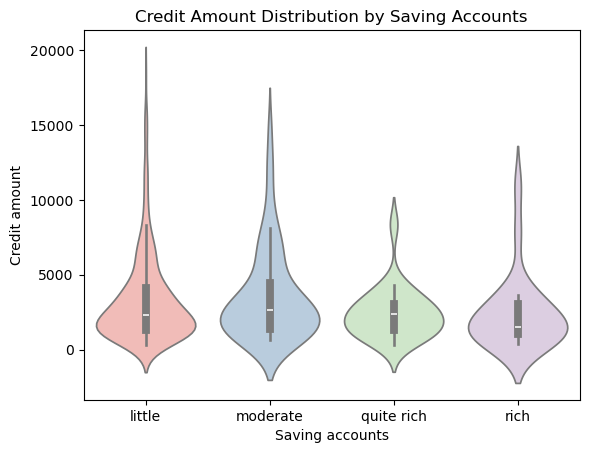

In [32]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [33]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\1218039141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=df, palette="Pastel2")
C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\1218039141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=df, palette="Pastel2")
C:\Users\Shabbir\AppData\Local\Temp\ipykernel_16220\1218039141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=df, palette="Pastel2")


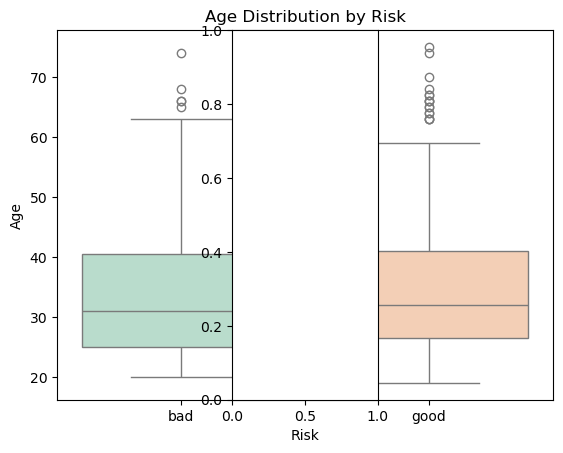

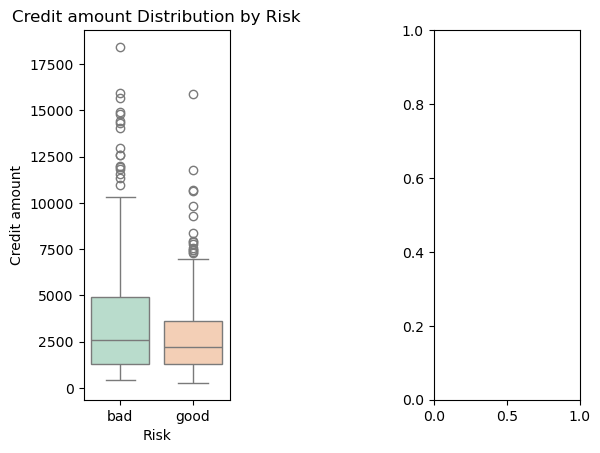

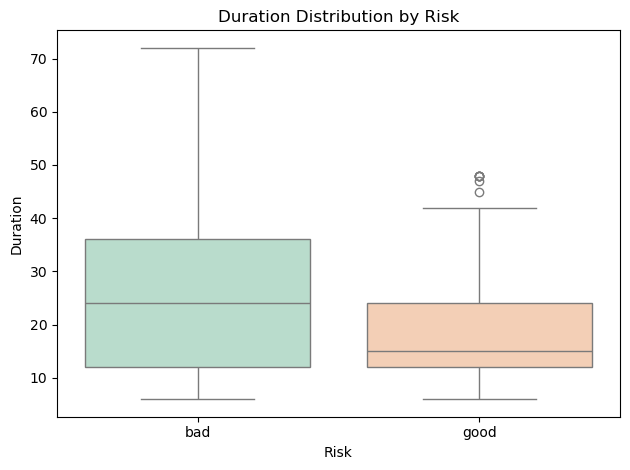

In [34]:
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    plt.figure(i)
    sns.boxplot(x="Risk", y=col, data=df, palette="Pastel2")
    plt.title(f'{col} Distribution by Risk')

plt.tight_layout()
plt.show()

In [35]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


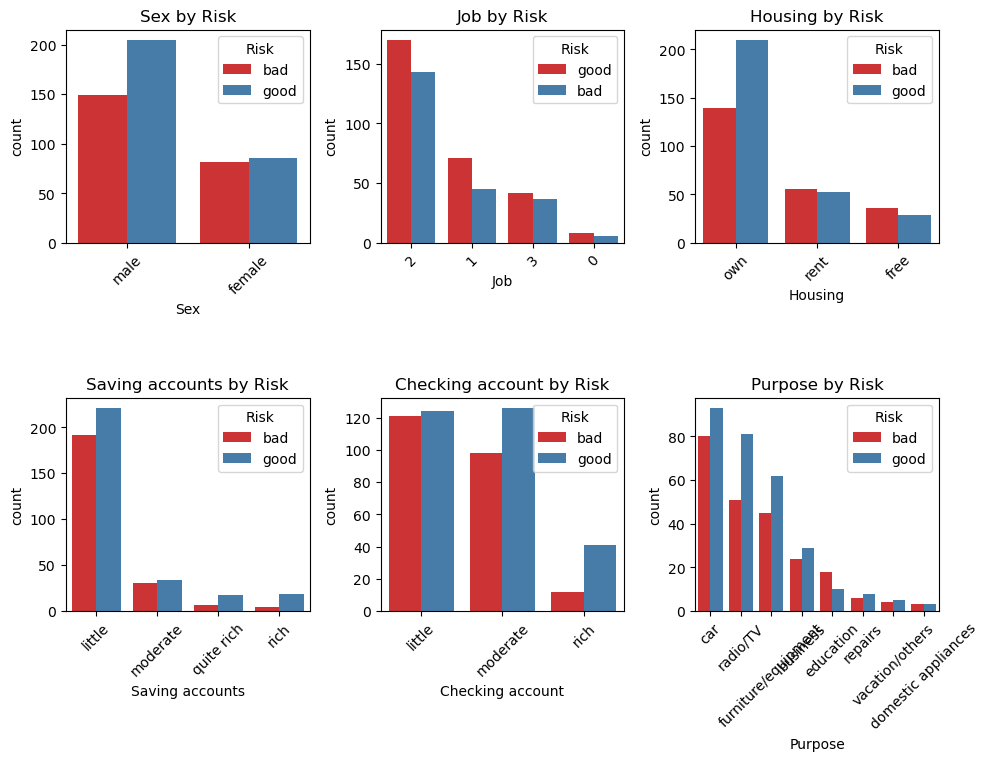

In [36]:
plt.figure(figsize=(10,10))
for i, col in enumerate(catagorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order=df[col].value_counts().index)
    plt.title(f'{col} by Risk')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [37]:
features = ["Age", "Sex", "Job", "Saving accounts", "Duration", "Housing", "Checking account", "Credit amount"]

In [38]:
target = "Risk"

In [39]:
df_model = df[features + [target]].copy()

In [40]:
df_model.head()

,Age,Sex,Job,Saving accounts,Duration,Housing,Checking account,Credit amount,Risk
0,22,female,2,little,48,own,moderate,5951,bad
1,45,male,2,little,42,free,little,7882,good
2,53,male,2,little,24,free,little,4870,bad
3,35,male,3,little,36,rent,moderate,6948,good
4,28,male,3,little,30,own,moderate,5234,bad


In [41]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [42]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

In [43]:
cat_cols

Index(['Sex', 'Saving accounts', 'Housing', 'Checking account'], dtype='object')

In [44]:
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [45]:
le_target = LabelEncoder()

In [46]:
df_model[target] = le_target.fit_transform(df_model[target])

In [47]:
df_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [48]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [49]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [50]:
df_model.head()

,Age,Sex,Job,Saving accounts,Duration,Housing,Checking account,Credit amount,Risk
0,22,0,2,0,48,1,1,5951,0
1,45,1,2,0,42,0,0,7882,1
2,53,1,2,0,24,0,0,4870,0
3,35,1,3,0,36,2,1,6948,1
4,28,1,3,0,30,1,1,5234,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df_model.drop(target, axis=1)

In [53]:
Y = df_model[target]

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [55]:
X_train.shape

(417, 8)

In [56]:
X_test.shape

(105, 8)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [58]:
def train_model(model, param_grid, X_train, Y_train, X_test, Y_test):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, Y_train)
    best_model = grid.best_estimator_
    Y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    return best_model, accuracy, grid.best_params_

In [59]:
dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
best_dt, accuracy_dt, params_dt = train_model(dt, dt_param_grid, X_train, Y_train, X_test, Y_test)

In [61]:
print("Best Discision Tree Accuracy:", accuracy_dt)

Best Discision Tree Accuracy: 0.6


In [62]:
print("Best Decision Tree Model Parameters:", params_dt)

Best Decision Tree Model Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [63]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
best_rf, accuracy_rf, params_rf = train_model(rf, rf_param_grid, X_train, Y_train, X_test, Y_test)

In [65]:
print("Random Forest Best Accuracy:", accuracy_rf)

Random Forest Best Accuracy: 0.6476190476190476


In [67]:
print("Best Params:", params_rf)

Best Params: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [69]:
et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [70]:
best_et, accuracy_et, params_et = train_model(et, et_param_grid, X_train, Y_train, X_test, Y_test)

In [71]:
print("extra Trees Best Accuracy:", accuracy_et)

extra Trees Best Accuracy: 0.638095238095238


In [72]:
print("Best params:", params_et)

Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [77]:
xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(Y_train==0).sum() / (Y_train==1).sum())
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0]
}

In [79]:
best_xgb, accuracy_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, Y_train, X_test, Y_test)

C:\Users\Shabbir\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [11:22:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:
print("XGB Best Accuracy:", accuracy_xgb)

XGB Best Accuracy: 0.7047619047619048


In [81]:
print("XGB best params:", params_xgb)

XGB best params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [82]:
best_xgb.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [83]:
joblib.dump(best_xgb, "xgb_credit_model.pkl")

['xgb_credit_model.pkl']